---
numbering:
  enumerator: "5.%s"
---

%# (PART) Common supervised algorithms {-} 


(chap_lasso)=
# Penalized regressions and sparse hedging for minimum variance portfolios 
\index{penalized regression}

In this chapter, we introduce the widespread concept of regularization for linear models. There are in fact several possible applications for these models. The first one is straightforward: resort to penalizations to improve the robustness of factor-based predictive regressions. The outcome can then be used to fuel an allocation scheme. For instance, @han2018firm and @rapach2019time use penalized regressions to improve stock return prediction when combining forecasts that emanate from individual characteristics. 

Similar ideas can be developed for macroeconomic predictions for instance, as in @uematsu2019high.
The second application stems from a less known result which originates from @stevens1998inverse. It links the weights of optimal mean-variance portfolios to particular cross-sectional regressions. The idea is then different and the purpose is to improve the quality of mean-variance driven portfolio weights. We present the two approaches below after an introduction on regularization techniques for linear models. 

Other examples of financial applications of penalization can be found in @d2011identifying, @ban2016machine and @kremer2019sparse. In any case, the idea is the same as in the seminal paper @tibshirani1996regression: standard (unconstrained) optimization programs may lead to noisy estimates, thus adding a structuring constraint helps remove some noise (at the cost of a possible bias). For instance, @kremer2019sparse use this concept to build more robust mean-variance (@markowitz1952portfolio) portfolios and @freyberger2020dissecting use it to single out the characteristics that *really* help explain the cross-section of equity returns. 


## Penalized regressions
\index{penalized regression}

(penreg)=
### Simple regressions 
\index{simple regression} \index{regression}
The ideas behind linear models are at least two centuries old (@legendre1805nouvelles is an early reference on least squares optimization). Given a matrix of predictors $\textbf{X}$, we seek to decompose the output vector $\textbf{y}$ as a linear function of the columns of $\textbf{X}$ (written $\textbf{X}\boldsymbol{\beta}$) plus an error term $\boldsymbol{\epsilon}$: $\textbf{y}=\textbf{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}$.

The best choice of $\boldsymbol{\beta}$ is naturally the one that minimizes the error. For analytical tractability, it is the sum of squared errors that is minimized: $L=\boldsymbol{\epsilon}'\boldsymbol{\epsilon}=\sum_{i=1}^I\epsilon_i^2$. The loss $L$ is called the sum of squared residuals (SSR). In order to find the optimal $\boldsymbol{\beta}$, it is imperative to differentiate this loss $L$ with respect to $\boldsymbol{\beta}$ because the first order condition requires that the gradient be equal to zero:
\begin{align*}
\nabla_{\boldsymbol{\beta}} L&=\frac{\partial}{\partial \boldsymbol{\beta}}(\textbf{y}-\textbf{X}\boldsymbol{\beta})'(\textbf{y}-\textbf{X}\boldsymbol{\beta})=\frac{\partial}{\partial \boldsymbol{\beta}}\boldsymbol{\beta}'\textbf{X}'\textbf{X}\boldsymbol{\beta}-2\textbf{y}'\textbf{X}\boldsymbol{\beta} \\
&=2\textbf{X}'\textbf{X}\boldsymbol{\beta}  -2\textbf{X}'\textbf{y}
\end{align*}
so that the first order condition $\nabla_{\boldsymbol{\beta}}=\textbf{0}$ is satisfied if 

```{math}
:label: regbeta
\boldsymbol{\beta}^*=(\textbf{X}'\textbf{X})^{-1}\textbf{X}'\textbf{y},
```

which is known as the standard **ordinary least squares** (OLS)\index{ordinary least squares} solution of the linear model. If the matrix $\textbf{X}$ has dimensions $I \times K$, then the $\textbf{X}'\textbf{X}$ can only be inverted if the number of rows $I$ is strictly superior to the number of columns $K$. In some cases, that may not hold; there are more predictors than instances and there is no unique value of $\boldsymbol{\beta}$ that minimizes the loss. If $\textbf{X}'\textbf{X}$ is nonsingular (or positive definite), then the second order condition ensures that $\boldsymbol{\beta}^*$ yields a global minimum for the loss $L$ (the second order derivative of $L$ with respect to $\boldsymbol{\beta}$, the Hessian matrix, is exactly $\textbf{X}'\textbf{X}$). 

Up to now, we have made no distributional assumption on any of the above quantities. Standard assumptions are the following:   
- $\mathbb{E}[\textbf{y}|\textbf{X}]=\textbf{X}\boldsymbol{\beta}$: **linear shape for the regression function**;   
- $\mathbb{E}[\boldsymbol{\epsilon}|\textbf{X}]=\textbf{0}$: errors are **independent of predictors**;    
- $\mathbb{E}[\boldsymbol{\epsilon}\boldsymbol{\epsilon}'| \textbf{X}]=\sigma^2\textbf{I}$: **homoscedasticity** - errors are uncorrelated and have identical variance;   
- the $\epsilon_i$ are normally distributed.

Under these hypotheses, it is possible to perform statistical tests related to the $\hat{\boldsymbol{\beta}}$ coefficients. We refer to chapters 2 to 4 in @greene2018econometric for a thorough treatment on linear models as well as to chapter 5 of the same book for details on the corresponding tests.


### Forms of penalizations
\index{penalized regression}
Penalized regressions have been popularized since the seminal work of @tibshirani1996regression. The idea is to impose a constraint on the coefficients of the regression, namely that their total magnitude be restrained. In his original paper, @tibshirani1996regression proposes to estimate the following model (LASSO):\index{LASSO}

```{math}
:label: lasso1
y_i = \sum_{j=1}^J \beta_jx_{i,j} + \epsilon_i, \quad i =1,\dots,I, \quad \text{s.t.} \quad \sum_{j=1}^J |\beta_j| < \delta, 
```

for some strictly positive constant $\delta$. Under least square minimization, this amounts to solve the Lagrangian formulation:

```{math}
:label: lasso2
\underset{\mathbf{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J \beta_jx_{i,j} \right)^2+\lambda \sum_{j=1}^J |\beta_j| \right\},
```

for some value $\lambda>0$ which naturally depends on $\delta$ (the lower the $\delta$, the higher the $\lambda$: the constraint is more binding). This specification seems close to the ridge regression ($L^2$ regularization), which is in fact anterior to the Lasso:\index{ridge regression}

```{math}
:label: ridge
\underset{\mathbf{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J\beta_jx_{i,j} \right)^2+\lambda \sum_{j=1}^J \beta_j^2 \right\},
```

and which is equivalent to estimating the following model

```{math}
:label: ridge6
y_i = \sum_{j=1}^J \beta_jx_{i,j} + \epsilon_i, \quad i =1,\dots,I, \quad \text{s.t.} \quad \sum_{j=1}^J \beta_j^2 < \delta, 
```

but the outcome is in fact quite different, which justifies a separate treatment. Mechanically, as $\lambda$, the penalization intensity,\index{penalization intensity} increases (or as $\delta$ in \@ref(eq:ridge6) *decreases*), the coefficients of the ridge regression all slowly decrease in magnitude towards zero. In the case of the LASSO, the convergence is somewhat more brutal as some coefficients shrink to zero very quickly. For $\lambda$ sufficiently large, only one coefficient will remain nonzero, while in the ridge regression, the zero value is only reached asymptotically for all coefficients. We invite the interested read to have a look at the survey in @hastie2020ridge about all applications of ridge regressions in data science with links to other topics like cross-validation\index{cross-validation} and dropout regularization\index{dropout}, among others.\index{ridge regression}

To depict the difference between the Lasso and the ridge regression, let us consider the case of $K=2$ predictors which is shown in Figure \@ref(fig:lassoridge). The optimal unconstrained solution $\boldsymbol{\beta}^*$ is pictured in red in the middle of the space. The problem is naturally that it does not satisfy the imposed conditions. These constraints are shown in light grey: they take the shape of a square $|\beta_1|+|\beta_2| \le \delta$ in the case of the Lasso and a circle $\beta_1^2+\beta_2^2 \le \delta$ for the ridge regression. In order to satisfy these constraints, the optimization needs to look in the vicinity of $\boldsymbol{\beta}^*$ by allowing for larger error levels. These error levels are shown as orange ellipsoids in the figure. When the requirement on the error is loose enough, one ellipsoid touches the acceptable boundary (in grey) and this is where the constrained solution is located. 



```{figure} images/lassoridge.png
:name: fig-lassoridge
Schematic view of Lasso (left) versus ridge (right) regressions.
```

Both methods work when the number of exogenous variables surpasses that of observations, i.e., in the case where classical regressions are ill-defined. This is easy to see in the case of the ridge regression for which the OLS solution is simply 
$$\hat{\boldsymbol{\beta}}=(\mathbf{X}'\mathbf{X}+\lambda \mathbf{I}_N)^{-1}\mathbf{X}'\mathbf{Y}.$$
The additional term $\lambda \mathbf{I}_N$ compared to Equation \@ref(eq:regbeta) ensures that the inverse matrix is well-defined whenever $\lambda>0$. As $\lambda$ increases, the magnitudes of the $\hat{\beta}_i$ decrease, which explains why penalizations are sometimes referred to as **shrinkage** methods (the estimated coefficients see their values shrink). \index{ridge regression}

@zou2005regularization propose to benefit from the best of both worlds when combining both penalizations in a convex manner (which they call the **elasticnet**):\index{elasticnet}

```{math}
:label: elasticnet
y_i = \sum_{j=1}^J \beta_jx_{i,j} + \epsilon_i, \quad \text{s.t.} \quad \alpha \sum_{j=1}^J |\beta_j| +(1-\alpha)\sum_{j=1}^J \beta_j^2< \delta, \quad i =1,\dots,N,
```

which is associated to the optimization program

```{math}
:label: elastic
\underset{\mathbf{\beta}}{\min} \, \left\{ \sum_{i=1}^I\left(y_i - \sum_{j=1}^J\beta_jx_{i,j} \right)^2+\lambda \left(\alpha\sum_{j=1}^J |\beta_j|+ (1-\alpha)\sum_{j=1}^J \beta_j^2\right) \right\}.
```


The main advantage of the LASSO compared to the ridge regression is its selection capability. Indeed, given a very large number of variables (or predictors), the LASSO will progressively rule out those that are the least relevant. The elasticnet preserves this selection ability and @zou2005regularization argue that in some cases, it is even more effective than the LASSO. The parameter $\alpha \in [0,1]$ tunes the smoothness of convergence (of the coefficients) towards zero. The closer $\alpha$ is to zero, the smoother the convergence.


### Illustrations

We begin with simple illustrations of penalized regressions. We start with the LASSO. First, we estimate the coefficients. By default, the function chooses a large array of penalization values so that the results for different penalization intensities ($\lambda$) can be shown immediately.\index{penalized regression}

In [28]:
from sklearn.linear_model import lasso_path, Ridge, ElasticNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import acf
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Building the data & import functions
from data_build import generate_data
data_ml, features, features_short, returns, stock_ids, stock_ids_short = generate_data()
features_short =["Div_yld", "EPS", "Size12m", "Mom_LT", "Ocf", "PB", "Vol_LT"]
separation_date = "2017-01-15"

data_ml_clean = data_ml.dropna(subset=(features_short+ ['R1M']))
y_penalized = data_ml_clean['R1M'].values
x_penalized = data_ml_clean[features_short].values

# Compute LASSO path (alpha=1 in sklearn corresponds to pure LASSO)
alphas_lasso, coefs_lasso, _ = lasso_path(x_penalized, y_penalized)  # Model: LASSO

Once the coefficients are computed, they require some wrangling before plotting. Also, there are too many of them, so we only plot a subset of them.

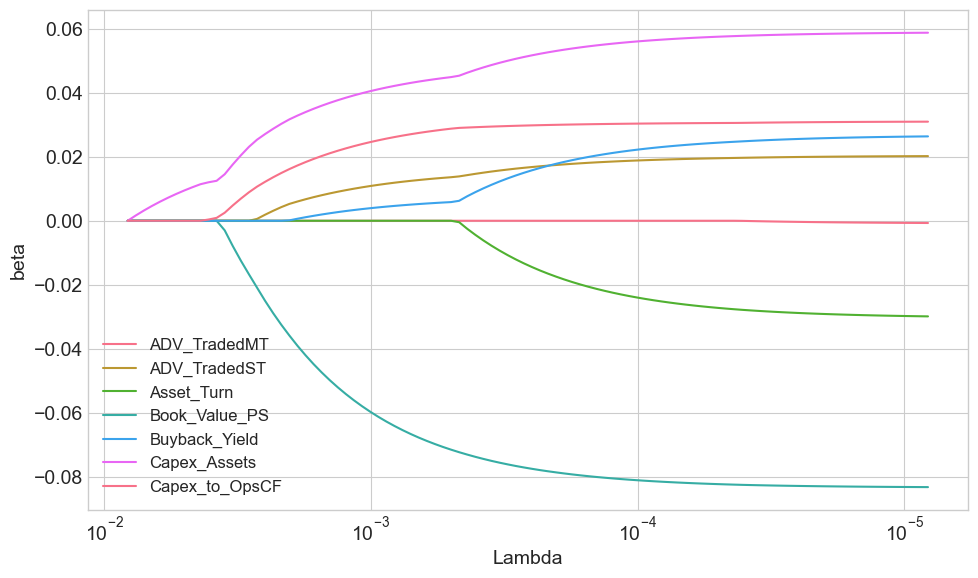

In [29]:
#| label: fig-lasso_plot
#| fig-cap: "LASSO coefficients. The dependent variable is the 1 month ahead return"

n_features_to_plot = min(10, len(features_short)) 

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
for i in range(n_features_to_plot):
    plt.plot(alphas_lasso, coefs_lasso[i, :], label=features[i])

plt.xlabel('Lambda')
plt.ylabel('beta')
plt.xscale('log')
plt.gca().invert_xaxis()  # Higher lambda = more regularization
plt.tight_layout()
plt.legend(fontsize=12, loc='best', facecolor='white')
plt.show()

The graph plots the evolution of coefficients as the penalization intensity,\index{penalization intensity} $\lambda$, increases. For some characteristics, like Asset Turnover (in green), the convergence to zero is rapid. Other variables resist the penalization longer, like Capex Assets, which is the last one to vanish. Essentially, this means that at the first order, this variable is an important driver of future 1-month returns in our sample. 

Next, we turn to ridge regressions.

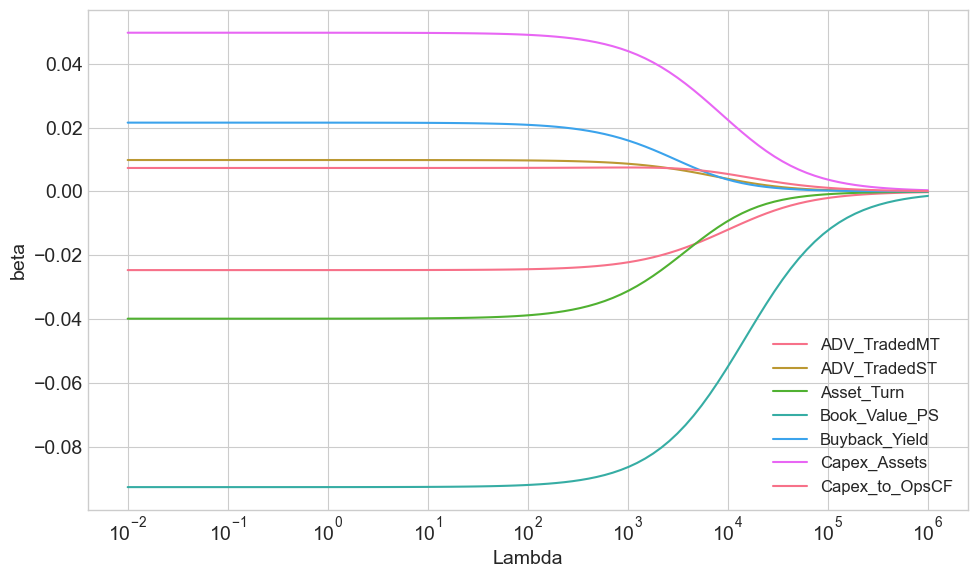

In [30]:
#| label: fig-ridge_plot
#| fig-cap: "Ridge coefficients. The dependent variable is the 1 month ahead return"

alphas_ridge = np.logspace(-2, 6, 100)  # Range of regularization values
coefs_ridge = []

for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha, fit_intercept=True)
    ridge.fit(x_penalized, y_penalized)
    coefs_ridge.append(ridge.coef_)

coefs_ridge = np.array(coefs_ridge)  # Shape: (n_alphas, n_features)

# Plot Ridge coefficients
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
for i in range(n_features_to_plot):
    plt.plot(alphas_ridge, coefs_ridge[:, i], label=features[i])

plt.xlabel('Lambda')
plt.ylabel('beta')
plt.legend(fontsize=12, loc='best', facecolor='white')
plt.xscale('log')
plt.tight_layout()
plt.show()

In Figure \@ref(fig:sparseridge), the convergence to zero is much smoother. We underline that the x-axis (penalization intensities) have a log-scale. This allows to see the early patterns (close to zero, to the left) more clearly. As in the previous figure, the Mkt_Cap_3M_Usd predictor clearly dominates, with again large negative coefficients. Nonetheless, as $\lambda$ increases, its domination over the other predictor fades.  

By definition, the elasticnet will produce curves that behave like a blend of the two above approaches. Nonetheless, as long as $\alpha >0$, the selective property of the LASSO will be preserved: some features will see their coefficients shrink rapidly to zero. In fact, the strength of the LASSO is such that a balanced mix of the two penalizations is not reached at $\alpha = 1/2$, but rather at a much smaller value (possibly below 0.1).



## Sparse hedging for minimum variance portfolios

\index{sparse hedging}

### Presentation and derivations

The idea of constructing sparse portfolios\index{sparse portfolios} is not new per se (see, e.g., @brodie2009sparse, @fastrich2015constructing) and the link with the selective property of the LASSO is rather straightforward in classical quadratic programs. Note that the choice of the $L^1$ norm is imperative because when enforcing a simple $L^2$ norm, the diversification of the portfolio increases (see @coqueret2015diversified).

The idea behind this section stems from @goto2015improving but the cornerstone result was first published by @stevens1998inverse and we present it below. We provide details because the derivations are not commonplace in the literature.

In usual mean-variance allocations, one core ingredient is the inverse covariance matrix of assets $\mathbf{\Sigma}^{-1}$. For instance, the maximum Sharpe ratio (MSR) portfolio is given by 

\begin{equation}
(\#eq:MSR)
\mathbf{w}^{\text{MSR}}=\frac{\mathbf{\Sigma}^{-1}\boldsymbol{\mu}}{\mathbf{1}'\mathbf{\Sigma}^{-1}\boldsymbol{\mu}},
\end{equation}
where $\mathbf{\mu}$ is the vector of expected (excess) returns. Taking $\mathbf{\mu}=\mathbf{1}$ yields the minimum variance portfolio,\index{minimum variance portfolio} which is agnostic in terms of the first moment of expected returns (and, as such, usually more robust than most alternatives which try to estimate $\boldsymbol{\mu}$ and often fail).

Usually, the traditional way is to estimate $\boldsymbol{\Sigma}$ and to invert it to get the MSR weights. However, several approaches aim at estimating $\boldsymbol{\Sigma}^{-1}$ \textit{directly} and we present one of them below. We proceed one asset at a time, that is, one line of $\boldsymbol{\Sigma}^{-1}$ at a time.     
If we decompose the matrix $\mathbf{\Sigma}$ into: 
$$\mathbf{\Sigma}= \left[\begin{array}{cc} \sigma^2 & \mathbf{c}' \\
\mathbf{c}& \mathbf{C}\end{array} \right],$$
classical partitioning results (e.g., Schur complements) imply
$$\small \mathbf{\Sigma}^{-1}= \left[\begin{array}{cc} (\sigma^2 -\mathbf{c}'\mathbf{C}^{-1}\mathbf{c})^{-1} & - (\sigma^2 -\mathbf{c}'\mathbf{C}^{-1}\mathbf{c})^{-1}\mathbf{c}'\mathbf{C}^{-1} \\
- (\sigma^2 -\mathbf{c}'\mathbf{C}^{-1}\mathbf{c})^{-1}\mathbf{C}^{-1}\mathbf{c}& \mathbf{C}^{-1}+ (\sigma^2 -\mathbf{c}'\mathbf{C}^{-1}\mathbf{c})^{-1}\mathbf{C}^{-1}\mathbf{cc}'\mathbf{C}^{-1}\end{array} \right].$$
We are interested in the first line, which has 2 components: the factor $(\sigma^2 -\mathbf{c}'\mathbf{C}^{-1}\mathbf{c})^{-1}$ and the line vector $\mathbf{c}'\mathbf{C}^{-1}$. $\mathbf{C}$ is the covariance matrix of assets $2$ to $N$ and $\mathbf{c}$ is the covariance between the first asset and all other assets. The first line of $\mathbf{\Sigma}^{-1}$ is
\begin{equation}
(\#eq:sparse1)
(\sigma^2 -\mathbf{c}'\mathbf{C}^{-1}\mathbf{c})^{-1} \left[1 \quad  \underbrace{-\mathbf{c}'\mathbf{C}^{-1}}_{N-1 \text{ terms}} \right]. 
\end{equation}

We now consider an alternative setting. We regress the returns of the first asset on those of all other assets: 
\begin{equation}
(\#eq:sparseeq)
r_{1,t}=a_1+\sum_{n=2}^N\beta_{1|n}r_{n,t}+\epsilon_t, \quad \text{ i.e., } \quad  \mathbf{r}_1=a_1\mathbf{1}_T+\mathbf{R}_{-1}\mathbf{\beta}_1+\epsilon_1,
\end{equation}
where $\mathbf{R}_{-1}$ gathers the returns of all assets except the first one. The OLS estimator for $\mathbf{\beta}_1$ is
\begin{equation}
(\#eq:sparse2)
\hat{\mathbf{\beta}}_{1}=\mathbf{C}^{-1}\mathbf{c},
\end{equation}

and this is the partitioned form (when a constant is included to the regression) stemming from the Frisch-Waugh-Lovell theorem (see chapter 3 in @greene2018econometric).

In addition,
\begin{equation}
(\#eq:sparse3)
(1-R^2)\sigma_{\mathbf{r}_1}^2=\sigma_{\mathbf{r}_1}^2- \mathbf{c}'\mathbf{C}^{-1}\mathbf{c} =\sigma^2_{\epsilon_1}.
\end{equation}
The proof of this last fact is given below.

With $\mathbf{X}$ being the concatenation of $\mathbf{1}_T$ with returns $\mathbf{R}_{-1}$ and with $\mathbf{y}=\mathbf{r}_1$, the classical expression of the $R^2$ is $$R^2=1-\frac{\mathbf{\epsilon}'\mathbf{\epsilon}}{T\sigma_Y^2}=1-\frac{\mathbf{y}'\mathbf{y}-\hat{\mathbf{\beta}'}\mathbf{X}'\mathbf{X}\hat{\mathbf{\beta}}}{T\sigma_Y^2}=1-\frac{\mathbf{y}'\mathbf{y}-\mathbf{y}'\mathbf{X}\hat{\mathbf{\beta}}}{T\sigma_Y^2},$$ 
with fitted values $\mathbf{X}\hat{\mathbf{\beta}}= \hat{a_1}\mathbf{1}_T+\mathbf{R}_{-1}\mathbf{C}^{-1}\mathbf{c}$. Hence,
\begin{align*}
T\sigma_{\mathbf{r}_1}^2R^2&=T\sigma_{\mathbf{r}_1}^2-\mathbf{r}'_1\mathbf{r}_1+\hat{a_1}\mathbf{1}'_T\mathbf{r}_1+\mathbf{r}'_1\mathbf{R}_{-1}\mathbf{C}^{-1}\mathbf{c} \\
T(1-R^2)\sigma_{\mathbf{r}_1}^2&=\mathbf{r}'_1\mathbf{r}_1-\hat{a_1}\mathbf{1}'_T\mathbf{r}_1-\left(\mathbf{\tilde{r}}_1+\frac{\mathbf{1}_T\mathbf{1}'_T}{T}\mathbf{r}_1\right)'\left(\tilde{\mathbf{R}}_{-1}+\frac{\mathbf{1}_T\mathbf{1}'_T}{T}\mathbf{R}_{-1}\right)\mathbf{C}^{-1}\mathbf{c} \\
T(1-R^2)\sigma_{\mathbf{r}_1}^2&=\mathbf{r}'_1\mathbf{r}_1-\hat{a_1}\mathbf{1}'_T\mathbf{r}_1-T\mathbf{c}'\mathbf{C}^{-1}\mathbf{c} -\mathbf{r}'_1\frac{\mathbf{1}_T\mathbf{1}'_T}{T}\mathbf{R}_{-1} \mathbf{C}^{-1}\mathbf{c} \\
T(1-R^2)\sigma_{\mathbf{r}_1}^2&=\mathbf{r}'_1\mathbf{r}_1-\frac{(\mathbf{1}'_T\mathbf{r}_1)^2}{T}- T\mathbf{c}'\mathbf{C}^{-1}\mathbf{c} \\
(1-R^2)\sigma_{\mathbf{r}_1}^2&=\sigma_{\mathbf{r}_1}^2- \mathbf{c}'\mathbf{C}^{-1}\mathbf{c} 
\end{align*}
where in the fourth equality we have plugged $\hat{a}_1=\frac{\mathbf{1'}_T}{T}(\mathbf{r}_1-\mathbf{R}_{-1}\mathbf{C}^{-1}\mathbf{c})$. Note that there is probably a simpler proof, see, e.g., section 3.5 in @greene2018econometric.

Combining (\@ref(eq:sparse1), (\@ref(eq:sparse2)) and (\@ref(eq:sparse3)), we get that the first line of $\mathbf{\Sigma}^{-1}$ is equal to 
\begin{equation}
(\#eq:sparsehedgeeq2)
\frac{1}{\sigma^2_{\epsilon_1}}\times \left[ 1 \quad  -\hat{\boldsymbol{\beta}}_1'\right].
\end{equation}

Given the first line of $\mathbf{\Sigma}^{-1}$, it suffices to multiply by $\boldsymbol{\mu}$ to get the portfolio weight in the first asset (up to a scaling constant).

There is a nice economic intuition behind the above results which justifies the term "sparse hedging".\index{sparse hedging} We take the case of the minimum variance portfolio,\index{minimum variance portfolio} for which $\boldsymbol{\mu}=\boldsymbol{1}$. In Equation \@ref(eq:sparseeq), we try to explain the return of asset 1 with that of all other assets. In the above equation, up to a scaling constant, the portfolio has a unit position in the first asset and $-\hat{\boldsymbol{\beta}}_1$ positions in all other assets. Hence, the purpose of all other assets is clearly to hedge the return of the first one. In fact, these positions are aimed at minimizing the squared errors of the aggregate portfolio for the first asset (these errors are exactly $\mathbf{\epsilon}_1$). Moreover, the scaling factor $\sigma^{-2}_{\epsilon_1}$ is also simple to interpret: the more we trust the regression output (because of a small $\sigma^{2}_{\epsilon_1}$), the more we invest in the hedging portfolio of the asset. 

This reasoning is easily generalized for any line of $\mathbf{\Sigma}^{-1}$, which can be obtained by regressing the returns of asset $i$ on the returns of all other assets. If the allocation scheme has the form (\@ref(eq:MSR)) for given values of $\boldsymbol{\mu}$, then the pseudo-code for the sparse portfolio strategy is the following. 


At each date (which we omit for notational convenience),

- For all stocks $i$,     
1. estimate the elasticnet regression over the $t=1,\dots,T$ samples to get the $i^{th}$ line of $\hat{\mathbf{\Sigma}}^{-1}$:
$$ \small \left[\hat{\mathbf{\Sigma}}^{-1}\right]_{i,\cdot}= \underset{\mathbf{\beta}_{i|}}{\text{argmin}}\, \left\{\sum_{t=1}^T\left( r_{i,t}-a_i+\sum_{n\neq i}^N\beta_{i|n}r_{n,t}\right)^2+\lambda \alpha ||  \mathbf{\beta}_{i|}||_1+\lambda (1-\alpha)||\mathbf{\beta}_{i|}||_2^2\right\}
$$    
2. to get the weights of asset $i$, we compute the $\mathbf{\mu}$-weighted sum: 
$w_i= \sigma_{\epsilon_i}^{-2}\left(\mu_i- \sum_{j\neq i}\mathbf{\beta}_{i|j}\mu_j\right)$,


where we recall that the vectors $\mathbf{\beta}_{i|}=[\mathbf{\beta}_{i|1},\dots,\mathbf{\beta}_{i|i-1},\mathbf{\beta}_{i|i+1},\dots,\mathbf{\beta}_{i|N}]$ are the coefficients from regressing the returns of asset $i$ against the returns of all other assets.  
The introduction of the **penalization norms** is the new ingredient, compared to the original approach of @stevens1998inverse. The benefits are twofold: first, introducing constraints yields weights that are more robust and less subject to errors in the estimates of $\mathbf{\mu}$; second, because of sparsity, weights are more stable, less leveraged and thus the strategy is less impacted by transaction costs. Before we turn to numerical applications, we mention a more direct route to the estimation of a **robust inverse covariance matrix**: the Graphical LASSO. The GLASSO estimates the precision matrix (inverse covariance matrix) via maximum likelihood while imposing constraints/penalizations on the weights of the matrix. When the penalization is strong enough, this yields a sparse matrix, i.e., a matrix in which some and possibly many coefficients are zero. We refer to the original article @friedman2008sparse for more details on this subject. 





(sparseex)=
### Example 


The interest of sparse hedging portfolios\index{sparse hedging} is to propose a robust approach to the estimation of minimum variance policies.\index{minimum variance portfolio} Indeed, since the vector of expected returns $\boldsymbol{\mu}$ is usually very noisy, a simple solution is to adopt an agnostic view by setting $\boldsymbol{\mu}=\boldsymbol{1}$. In order to test the added value of the sparsity constraint, we must resort to a full backtest.\index{backtest} In doing so, we anticipate the content of Chapter \@ref(backtest).

We first prepare the variables. Sparse portfolios are based on returns only; we thus base our analysis on the dedicated variable in matrix/rectangular format (*returns*) which were created at the end of Chapter \@ref(notdata). 

Then, we initialize the output variables: portfolio weights and portfolio returns. We want to compare three strategies: an equally weighted (EW)\index{equally weighted portfolio} benchmark of all stocks, the classical global minimum variance portfolio (GMV) and the sparse-hedging approach to minimum variance.



In [31]:
# Out-of-sample dates
t_oos = returns.loc[returns['date'] > separation_date, 'date'].unique()
t_oos = pd.to_datetime(t_oos)                                          # Transform to datetime format

Tt = len(t_oos)                                                        # Nb of dates
nb_port = 3                                                            # Nb of portfolios/strats.
n_assets = returns.shape[1] - 1                                        # Number of assets (excluding date)
portf_weights = np.zeros((Tt, nb_port, n_assets))                      # Initial portf. weights
portf_returns = np.zeros((Tt, nb_port))                                # Initial portf. returns

Next, because it is the purpose of this section, we isolate the computation of the weights of sparse-hedging portfolios. In the case of minimum variance portfolios, when $\boldsymbol{\mu}=\boldsymbol{1}$, the weight in asset 1 will simply be the sum of all terms in Equation \@ref(eq:sparsehedgeeq2) and the other weights have similar forms.



In [32]:

def weights_sparsehedge(returns, alpha, lambda_param):  # The parameters are defined here
    """Compute sparse hedging portfolio weights."""
    n_assets = returns.shape[1]
    w = np.zeros(n_assets)                              # Initiate weights
    
    for i in range(n_assets):                           # Loop on the assets
        y = returns[:, i]                               # Dependent variable
        x = np.delete(returns, i, axis=1)               # Independent variables (all except i)
        
        # ElasticNet in sklearn: alpha = lambda, l1_ratio = alpha (mixing parameter)
        fit = ElasticNet(alpha=lambda_param, l1_ratio=alpha, fit_intercept=True)
        fit.fit(x, y)
        
        err = y - fit.predict(x)                        # Prediction errors
        w[i] = (1 - np.sum(fit.coef_)) / np.var(err)    # Output: weight of asset i
    
    return w / np.sum(w)                                # Normalisation of weights

We define a meta-weighting function that embeds three strategies.

In [33]:
def weights_multi(returns, j, alpha, lambda_param):
    """Compute portfolio weights for different strategies."""
    N = returns.shape[1]
    
    if j == 1:                                          # j = 1 => EW
        return np.ones(N) / N
    
    if j == 2:                                          # j = 2 => Minimum Variance
        sigma = np.cov(returns, rowvar=False) + 0.01 * np.eye(N)  # Covariance matrix + regularizing term
        w = np.linalg.solve(sigma, np.ones(N))          # Inverse & multiply
        return w / np.sum(w)                            # Normalize
    
    if j == 3:                                          # j = 3 => Penalised / elasticnet
        return weights_sparsehedge(returns, alpha, lambda_param)

Finally, we proceed to the backtesting loop.

In [34]:
for t in range(len(t_oos)):                                              # Loop = rebal. dates
    # Data for weights (expanding window)
    temp_data = returns.loc[returns['date'] < t_oos[t]].drop(columns='date').values
    
    # OOS returns
    realised_returns = returns.loc[returns['date'] == t_oos[t]].drop(columns='date').values.flatten()
    
    for j in range(1, nb_port + 1):                                      # Loop over strats
        portf_weights[t, j-1, :] = weights_multi(temp_data, j, 0.1, 0.1) # Hard-coded params!
        portf_returns[t, j-1] = np.sum(portf_weights[t, j-1, :] * realised_returns)  # Portf. returns

# Convert to DataFrame with column names
portf_returns_df = pd.DataFrame(portf_returns, columns=["EW", "MV", "Sparse"])

# Portfolio volatilities (monthly scale)
print(portf_returns_df.std())

EW        0.059407
MV        0.039333
Sparse    0.050662
dtype: float64



The aim of the sparse hedging\index{sparse hedging} restrictions is to provide a better estimate of the covariance structure of assets so that the estimation of minimum variance portfolio weights is more accurate. From the above exercise, we see that the monthly volatility is indeed reduced when building covariance matrices based on sparse hedging relationships. This is not the case if we use the shrunk sample covariance matrix because there is probably too much noise in the estimates of correlations between assets. Working with daily returns would likely improve the quality of the estimates. But the above backtest shows that the penalized methodology performs well even when the number of observations (dates) is small compared to the number of assets. 

## Predictive regressions

\index{predictive regression}

### Literature review and principle

The topic of predictive regressions sits on a collection of very interesting articles. One influential contribution is @stambaugh1999predictive, where the author shows the perils of regressions in which the independent variables are autocorrelated. In this case, the usual OLS estimate is biased and must therefore be corrected. The results have since then been extended in numerous directions (see @campbell2006efficient and @hjalmarsson2011new, the survey in @gonzalo2018predictive and, more recently, the study of @xu2020testing on predictability over multiple horizons).

A second important topic pertains to the time-dependence of the coefficients in predictive regressions. One contribution in this direction is @dangl2012predictive, where coefficients are estimated via a Bayesian procedure. More recently @kelly2019characteristics use time-dependent factor loadings to model the cross-section of stock returns. The time-varying nature of coefficients of predictive regressions is further documented by @henkel2011time for short term returns. Lastly, @farmer2019pockets introduce the concept of pockets of predictability: assets or markets experience different phases; in some stages, they are predictable and in some others, they aren't. Pockets are measured both by the number of days that a *t*-statistic is above a particular threshold and by the magnitude of the $R^2$ over the considered period. Formal statistical tests are developed by @demetrescu2020testing.

The introduction of penalization within predictive regressions goes back at least to @rapach2013international, where they are used to assess lead-lag relationships between US markets and other international stock exchanges.\index{penalized regression} More recently, @chinco2019sparse use LASSO regressions to forecast high frequency returns based on past returns (in the cross-section) at various horizons. They report statistically significant gains. @han2018firm and @rapach2019time use LASSO and elasticnet regressions (respectively) to improve forecast combinations and single out the characteristics that matter when explaining stock returns. Recently, @lee2022lasso introduce small variations on the LASSO aimed at improving coefficient estimation consistency.

These contributions underline the relevance of the overlap between predictive regressions\index{penalized regression} and penalized regressions. In simple machine-learning based asset pricing, we often seek to build models such as that of Equation \@ref(eq:genML). If we stick to a linear relationship and add penalization terms, then the model becomes:
$$r_{t+1,n} = \alpha_n + \sum_{k=1}^K\beta_n^kf^k_{t,n}+\epsilon_{t+1,n}, \quad \text{s.t.} \quad (1-\alpha)\sum_{j=1}^J |\beta_j| +\alpha\sum_{j=1}^J \beta_j^2< \theta$$
where we use $f^k_{t,n}$ or $x_{t,n}^k$ interchangeably and $\theta$ is some penalization intensity. Again, one of the aims of the regularization is to generate more robust estimates. If the patterns extracted hold out of sample, then 
$$\hat{r}_{t+1,n} = \hat{\alpha}_n + \sum_{k=1}^K\hat{\beta}_n^kf^k_{t,n},$$
will be a relatively reliable proxy of future performance. 



### Code and results

Given the form of our dataset, implementing penalized predictive regressions is easy.

In [35]:
training_sample = data_ml[data_ml['date'] <= separation_date].dropna(subset=(features_short + ['R1M']))
testing_sample = data_ml[data_ml['date'] > separation_date].dropna(subset=(features_short + ['R1M']))

y_penalized_train = training_sample['R1M'].values                  # Dependent variable
x_penalized_train = training_sample[features_short].values                   # Predictors

# Model: ElasticNet with alpha (lambda) = 0.1 and l1_ratio (alpha) = 0.1
fit_pen_pred = ElasticNet(alpha=0.1, l1_ratio=0.1, fit_intercept=True)
fit_pen_pred.fit(x_penalized_train, y_penalized_train)

,alpha,0.1
,l1_ratio,0.1
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


We then report two key performance measures: the mean squared error and the hit ratio, which is the proportion of times that the prediction guesses the sign of the return correctly. A detailed account of metrics is given later in the book (Chapter \@ref(backtest)). 


In [27]:
x_penalized_test = testing_sample[features_short].values                     # Predictors
y_test = testing_sample['R1M'].values

predictions = fit_pen_pred.predict(x_penalized_test)

# MSE
mse = np.mean((predictions - y_test) ** 2)
print(f"MSE: {mse}")

# Hit ratio
hit_ratio = np.mean(predictions * y_test > 0)
print(f"Hit ratio: {hit_ratio}")

MSE: 0.01020271805963522
Hit ratio: 0.5518135351648892


## Coding exercise

On the test sample, evaluate the impact of the two elastic net parameters on out-of-sample accuracy.